In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [2]:
data = np.load('/home/sdybing/mlaapde/testdata_preds/weighted_training/catmag_abserror_window_forwill.npy')
times = [1, 4, 9, 14, 19, 24, 34, 44, 54, 74, 94, 114]
mags = data[0,:,0]
error = data[:,:,1]

In [5]:
data.shape

(12, 85, 2)

In [6]:
### ----- FIGURE 8 ----- ###

fig = plt.figure(figsize = (11, 8), dpi = 300)
ax = fig.add_subplot(111)

P = []
for xx in times:
    for yy in mags:
        P.append((yy, xx))

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

y = np.linspace(1.0, 114.0, 1000)
x = np.linspace(0.7, 10, 1000)
X, Y = np.meshgrid(x, y)
Ti = griddata(P, error.flatten(), (X, Y), method = 'nearest')
cb = ax.contourf(X, Y, Ti, cmap = 'magma_r', levels = 199)
cs = ax.contour(X, Y, Ti, origin = 'lower', levels = [0.5], colors = ['black'], linewidths = 2.5, alpha = 0.75)
manual_locations = [(2.5, 74), (5.5, 10), (7.65, 59), (7.6, 109)]
ax.clabel(cs, inline = True, fmt = fmt, manual = manual_locations, fontsize = 12)
xt, yt = zip(*P)
ax.plot(xt, yt, '.', color = 'black', alpha = 0.5, ms = 0.5)
ax.set_xlabel('Catalog magnitude', fontsize = 15)
ax.set_ylabel('Window length (s)', fontsize = 15)
ax.tick_params(axis = 'x', labelsize = 13)
ax.tick_params(axis = 'y', labelsize = 13)
cbar = fig.colorbar(cb, ticks = [0, 1, 2, 3, 4], orientation = 'horizontal')
cbar.ax.tick_params(labelsize = 12)
cbar.ax.set_xlabel(xlabel = 'Absolute magnitude error (abs(median estimated magnitude - catalog magnitude))', fontsize = 13)
ax.set_xlim(0.7, 9.1)

# plt.show();
plt.savefig('/home/sdybing/mlaapde/testdata_preds/weighted_training/weightedtraining_errorheatmap.png', format = 'PNG')
plt.close();


In [7]:
origdata = np.load('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/catmag_abserror_window_forwill.npy')

weighted114 = data[-1,:,:]
orig114 = origdata[-1,:,:]

In [9]:
weighted114.shape

(85, 2)

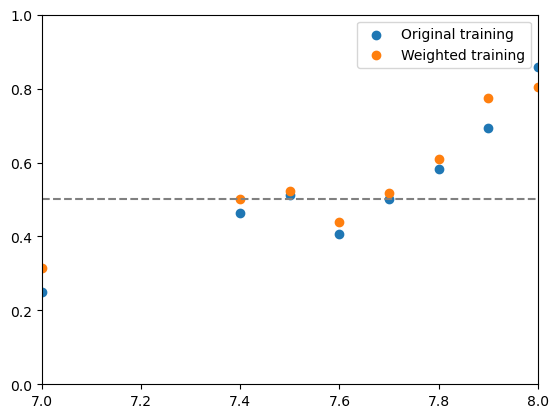

In [15]:
plt.scatter(orig114[:,0], orig114[:,1], label = 'Original training')
plt.scatter(weighted114[:,0], weighted114[:,1], label = 'Weighted training')
plt.axhline(y = 0.5, linestyle = '--', color = 'gray')
plt.legend()
plt.xlim(7,8)
plt.ylim(0,1);

In [28]:
i = np.where(orig114[:,0] == 7.7)[0]
i

array([70])

In [29]:
print(origdata[:,i,1])
print(data[:,i,1])

[[3.300575 ]
 [3.1968386]
 [3.0886886]
 [2.945547 ]
 [2.776594 ]
 [2.717635 ]
 [2.4977924]
 [2.268858 ]
 [2.1750247]
 [1.7291867]
 [1.4723427]
 [1.621657 ]
 [1.388205 ]
 [1.393357 ]
 [1.0881264]
 [0.837868 ]
 [0.659413 ]
 [0.6801   ]
 [0.6543905]
 [0.5554006]
 [0.538273 ]
 [0.5589683]
 [0.533713 ]
 [0.5802166]
 [0.5382764]
 [0.5016496]]
[[3.229854 ]
 [3.049212 ]
 [2.162319 ]
 [1.302582 ]
 [1.0547616]
 [0.7350747]
 [0.7907235]
 [0.582985 ]
 [0.647207 ]
 [0.4768335]
 [0.4911253]
 [0.5164244]]


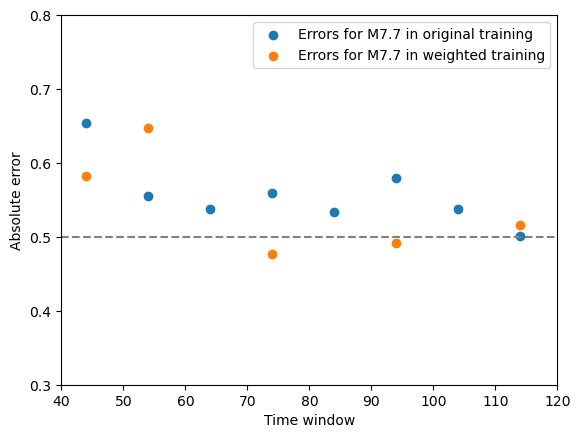

In [43]:
origtimes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 24, 29, 34, 44, 54, 64, 74, 84, 94, 104, 114]

plt.scatter(origtimes, origdata[:,i,1], label = 'Errors for M7.7 in original training')
plt.scatter(times, data[:,i,1], label = 'Errors for M7.7 in weighted training')
plt.axhline(y = 0.5, linestyle = '--', color = 'gray')
plt.legend()
plt.xlabel('Time window')
plt.ylabel('Absolute error');
plt.xlim(40,120)
plt.ylim(0.3,0.8);

In [41]:
k = np.where(times == 74)[0]
print(k)

[]


In [42]:
times

[1, 4, 9, 14, 19, 24, 34, 44, 54, 74, 94, 114]

In [44]:
times[9]

74

In [45]:
data[9]

array([[0.7      , 2.1186326],
       [0.8      , 1.9938175],
       [0.9      , 1.9261528],
       [1.       , 1.7513516],
       [1.1      , 1.3871378],
       [1.2      , 1.4409535],
       [1.3      , 1.3179621],
       [1.4      , 1.2106894],
       [1.5      , 1.077549 ],
       [1.6      , 1.0647067],
       [1.7      , 1.0213988],
       [1.8      , 0.887375 ],
       [1.9      , 0.8028933],
       [2.       , 0.6636925],
       [2.1      , 0.6502272],
       [2.2      , 0.6383012],
       [2.3      , 0.6049714],
       [2.4      , 0.5176877],
       [2.5      , 0.4404793],
       [2.6      , 0.406163 ],
       [2.7      , 0.3449207],
       [2.8      , 0.3037285],
       [2.9      , 0.2405082],
       [3.       , 0.218409 ],
       [3.1      , 0.1533429],
       [3.2      , 0.1209195],
       [3.3      , 0.0933747],
       [3.4      , 0.0682965],
       [3.5      , 0.0666687],
       [3.6      , 0.0673331],
       [3.7      , 0.1321662],
       [3.8      , 0.0188652],
       [

In [46]:
origtimes[21]

74

In [47]:
origdata[21]

array([[0.7      , 1.6987303],
       [0.8      , 1.931391 ],
       [0.9      , 1.7904802],
       [1.       , 1.6086404],
       [1.1      , 1.455727 ],
       [1.2      , 1.4683052],
       [1.3      , 1.3239045],
       [1.4      , 1.2028178],
       [1.5      , 1.0941253],
       [1.6      , 1.1108192],
       [1.7      , 1.0294536],
       [1.8      , 1.00024  ],
       [1.9      , 0.8182195],
       [2.       , 0.7006655],
       [2.1      , 0.6663388],
       [2.2      , 0.6709142],
       [2.3      , 0.6282491],
       [2.4      , 0.528656 ],
       [2.5      , 0.4853933],
       [2.6      , 0.4464675],
       [2.7      , 0.3856426],
       [2.8      , 0.358408 ],
       [2.9      , 0.297125 ],
       [3.       , 0.2867148],
       [3.1      , 0.2159885],
       [3.2      , 0.1777497],
       [3.3      , 0.1414651],
       [3.4      , 0.1098047],
       [3.5      , 0.120637 ],
       [3.6      , 0.145305 ],
       [3.7      , 0.2013603],
       [3.8      , 0.0500562],
       [